In [1]:
import course;course.header()

# Advanced Python Course 
## Mobi Heidelberg WS 2021/22
### by Christian Fufezan 

christian@fufezan.net

https://fufezan.net

<img src="./images/cc.png" alt="drawing" width="200" style="float: left;"/>


# Excersise No. 1

## Count Amino acid propensity in human proteome

Got to Uniprot and download the latests [here](https://www.uniprot.org/uniprot/?query=*&fil=organism%3A%22Homo+sapiens+%28Human%29+%5B9606%5D%22+AND+reviewed%3Ayes#)

The file containes protein sequences in FASTA format, i.e.
```txt
> (( Identifier line ))
(( Amino acid Sequence, can stretch over multiple lines ))
> (( next identifier line ))
```

Write a function that takes two arguments, 
 * a path to the a fasta database and  
 * an output file name.

The function should do the following:
 * parses the input fasta file 
 * counts the amino acid frequency and 
 * write a csv output file that looks like 

```
aa, count
A, 123123123
C, 3213
D, ...
```

In [3]:
import csv
from collections import Counter
import collections

aminoacid_counter = Counter()

with open ("uniprot-filtered-organism-human.fasta", "r") as input_file:
    for line in input_file:
        if line[0] != ">":
            line = line.strip()
            aminoacid_counter += Counter(line)
        


In [16]:
with open("output_exercise1.csv", "w", newline = "") as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["aa", "count"])
    for key, value in sorted(aminoacid_counter.items()):
        writer.writerow([key, str(value)])

## Plot a histogram for human
Use the dictionary created in a) to plot a histogram using your favorit lib

Create a standalone script that will plot the histogram
```bash
$ ./plot_aa_histogram.py "uniprot-filtered-proteome%3AUP000005640+AND+reviewed%3Ayes+AND+organism%3A%22Hom--.fasta"
```

In [13]:

col_names = ["Aminoacid", "Count"]

aminoacid_names = []

for key in sorted(aminoacid_counter):
    aminoacid_names.append(str(key))

print(aminoacid_names)

counter_values = []

for key in sorted(aminoacid_counter):
    counter_values.append((aminoacid_counter[key]))

print(counter_values)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
[796830, 261479, 538303, 807016, 414755, 746947, 297933, 492950, 651322, 1132151, 242299, 407911, 717583, 541826, 640498, 946345, 608033, 36, 677832, 138162, 302756]


Text(0.5, 1.0, 'Aminoacid Distribution Human')

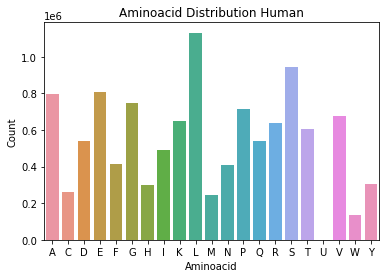

In [36]:
import pandas
import seaborn

df = pandas.DataFrame(list(zip(aminoacid_names, counter_values)), columns=col_names)


ax = seaborn.barplot(x="Aminoacid", y="Count", data=df)
ax.set_title("Aminoacid Distribution Human")


## Rinse and repeat 
Repeat counting and plotting for at leat one organism of the following kingdoms of life:
* Bacteria
* Archea 
* Plantae
* Animalia

In [24]:
aminoacid_counter_bacteria = Counter()

with open ("uniprot-Escherichia_coli.fasta", "r") as input_file:
    for line in input_file:
        if line[0] != ">":
            line = line.strip()
            aminoacid_counter_bacteria += Counter(line)
        
print(aminoacid_counter_bacteria)

Counter({'L': 745844, 'A': 685450, 'G': 534397, 'V': 510533, 'E': 439452, 'I': 415040, 'R': 412368, 'S': 387592, 'D': 381047, 'T': 372360, 'K': 320752, 'P': 313133, 'Q': 310364, 'F': 271473, 'N': 265900, 'M': 199065, 'Y': 192557, 'H': 164233, 'W': 100019, 'C': 80632, 'X': 44, 'U': 3, 'Z': 1})


In [25]:
col_names_bacteria = ["Aminoacid", "Count"]

aminoacid_names_bacteria = []

for key in sorted(aminoacid_counter_bacteria):
    aminoacid_names_bacteria.append(str(key))

print(aminoacid_names_bacteria)

counter_values_bacteria = []

for key in sorted(aminoacid_counter_bacteria):
    counter_values_bacteria.append((aminoacid_counter_bacteria[key]))

print(counter_values_bacteria)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[685450, 80632, 381047, 439452, 271473, 534397, 164233, 415040, 320752, 745844, 199065, 265900, 313133, 310364, 412368, 387592, 372360, 3, 510533, 100019, 44, 192557, 1]


Text(0.5, 1.0, 'Aminoacid Distribution Human')

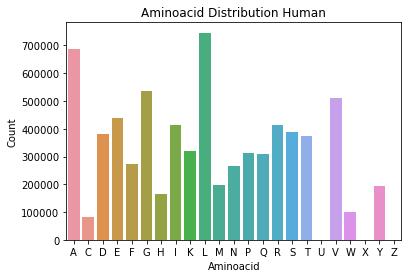

In [28]:
df_bacteria = pandas.DataFrame(list(zip(aminoacid_names_bacteria, counter_values_bacteria)), columns=col_names_bacteria)

ax = seaborn.barplot(x="Aminoacid", y="Count", data=df_bacteria)
ax.set_title("Aminoacid Distribution Human")


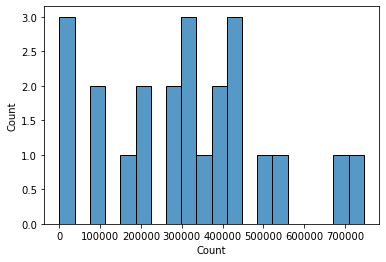

In [34]:
ax = seaborn.histplot(data=df_bacteria, x="Count", bins=20)

Das Histogramm zeigt, wie viele Aminosäuren in welchen Count-Bereich liegen.

Are there difference? 

There are differences in the Proteome of a Human and E. coli. In general, humans hava a larger Proteome and therefore the overall counts are way higher. Bacteria uses the Aminoacid Alanin (A) more frequently Humans use Serin (S) more often.Bacteria also use less of Cystein (C) but use Isoleucin (I) more frequently.

# Find special proteins

Find the most extreme proteins
* lowest / highest pI
* longest / shortest proteins
* highest density [mass / amino acid counts]
* most hydrophobic, hydrophic 
